# Bibliotecas

In [123]:
import pandas as pd
import seaborn as sns
import itertools

sns.set(rc={'figure.figsize':(11.7,8.27)})

## Datasets

In [95]:
body_splash_a = pd.read_csv('../perfumaria/dados/body_splash_a.csv')
body_splash_j = pd.read_csv('../perfumaria/dados/body_splash_j.csv')
antitranspirante_a = pd.read_csv('../perfumaria/dados/antitranspirante_a.csv')
antitranspirante_j = pd.read_csv('../perfumaria/dados/antitranspirante_j.csv')
shampoo_a = pd.read_csv('../perfumaria/dados/shampoo_a.csv')
shampoo_j = pd.read_csv('../perfumaria/dados/shampoo_j.csv')
sabonete_a = pd.read_csv('../perfumaria/dados/sabonete_a.csv')
sabonete_j = pd.read_csv('../perfumaria/dados/sabonete_j.csv')

### Body Splash

In [96]:
body_splash_a['loja'] = 'avon'
body_splash_j['loja'] = 'jequiti'

In [97]:
# concatenando dataframes #
body_splash= pd.concat([body_splash_a,body_splash_j])
#  #  #  #

# removendo a coluna 'Unnamed: 0' #
body_splash = body_splash.drop(columns={'Unnamed: 0'})
#  #  #  #

In [98]:
# transformando str em float #
body_splash['preco'] = body_splash['preco'].astype(float)
#  #  #  #

In [99]:
# ordenando preços #
body_splash = body_splash.sort_values('preco')
#  #  #  #

In [115]:
# estatistica #
analise_bs = body_splash.groupby('loja').describe()['preco']
analise_bs = analise_bs.drop(columns={'count'})
analise_bs
#  #  #  #

,mean,std,min,25%,50%,75%,max
loja,,,,,,,
avon,22.140,12.559817,0.00,12.39,23.99,23.990,44.90
jequiti,36.885,0.850000,36.46,36.46,36.46,36.885,38.16


In [132]:
# tranformando describe #
transform_describe = pd.DataFrame(columns=['loja', 'atributo', 'valor'])
for loja, atributo in itertools.product(analise_bs.index, analise_bs.columns):
    valor = analise_bs.at[loja, atributo]
    transform_describe = transform_describe.append({'loja': loja, 'atributo': atributo, 'valor': valor},
                           ignore_index=True)
    
transform_describe.head(3)
#  #  #  #

,loja,atributo,valor
0,avon,mean,22.140000
1,avon,std,12.559817
2,avon,min,0.000000


#### Analises 

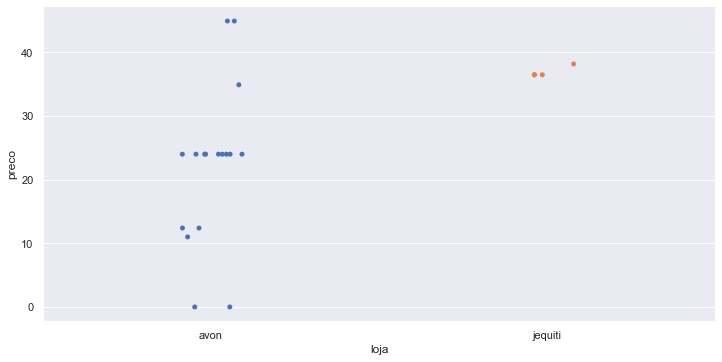

In [117]:
sns.catplot(x='loja', y='preco', data=body_splash, height=5, aspect=2)

O gráfico mostra a distruibuição de preços de body splashs de cada loja, sendo possivel observar como estão sendo espalhados os preços dos produtos. A partir de uma perspectiva mais analítica, é visivel que a Avon possui uma distruibuição de preço mais 'espalhada' em relaçao a Jequiti, englobando maiores faixas de preço, logo, a Avon possui um arsenal maior de body splash. 

<AxesSubplot:xlabel='loja', ylabel='preco'>

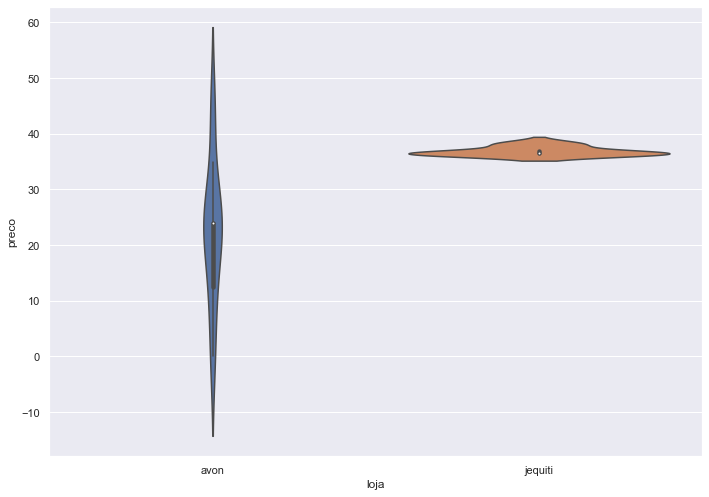

In [118]:
sns.violinplot(x='loja', y='preco', data=body_splash)

É possivel notar que cada uma das lojas possui uma concentração de preços em diferentes faixas, a Jequiti possui uma expressiva quantidade de produtos na faixa de R$ 35,00, enquanto os preços da Avon se concentram mais uniformimente em diferentes faixas. A partir desse gráfico, também é possível visualizar de forma clara o piso e o teto de cada loja.

Obs: considerei como "0,0" produtos que estavam indisponiveis, logo, é possível notar que a Avon possui alguns produtos indisponiveis no estoque enquanto a Jequiti está com todos os produtos disponiveis.

<AxesSubplot:xlabel='loja', ylabel='preco'>

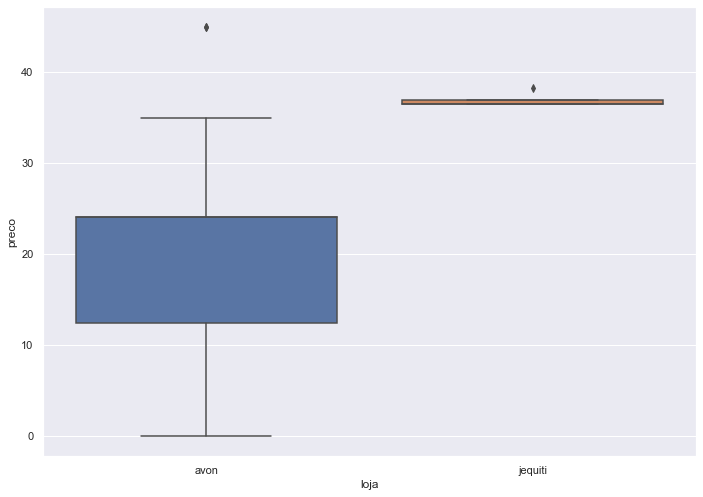

In [119]:
sns.boxplot(x='loja', y='preco', data=body_splash)

Neste gráfico podemos observar o bloco de agrupamento dos preços, por exemplo, a Jequiti possui uma caixa mais achatada, nos dizendo que a informação daquela parte dos preços é de alta previsibilidade, ao mesmo tempo em que há pouca variabilidade. A loja da Avon, pelo contrário, é que possui maior variabilidade , enquanto que sua previsibilidade torna-se um pouco mais escassa.

<AxesSubplot:xlabel='atributo', ylabel='valor'>

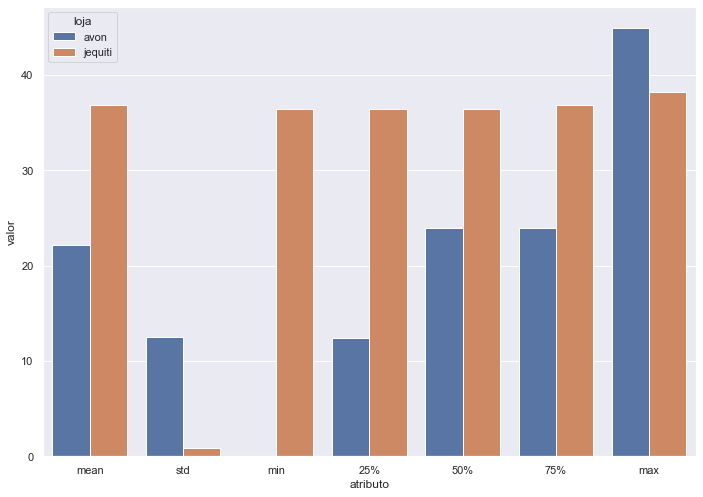

In [133]:
sns.barplot(x= 'atributo', y = 'valor', hue = 'loja', data = transform_describe)

In [ ]:
O maior desvio padrao é da avon, confirmando a análise anterior no boxplot.

### Antitranspirante

### Shampoo

### Sabonete